In [4]:
!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/73/64/1db43417cf7ed430f104a347126b5260a1724ee9a1b7d0b1622262c9c4df/fredapi-0.5.2-py3-none-any.whl.metadata


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
# pd.set_option('max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred 
fred_key = '3512ee29dc0e67dca5d3432fc7f77cbf'

# 1. Create The Fred Object

In [8]:
fred = Fred(api_key=fred_key)

# Search for economic data

In [13]:
sp_search = fred.search('S&P', order_by='popularity')

In [15]:
 sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-27,2024-06-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-26 09:44:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-27,2024-06-27,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-27,2024-06-27,S&P 500,2014-06-27,2024-06-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-26 19:11:05-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-27,2024-06-27,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-27,2024-06-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-26 09:44:10-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-06-27,2024-06-27,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-06-27,2024-06-27,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-06-27,2024-06-27,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


# Pull raw data

<Axes: title={'center': 'S&P 500'}>

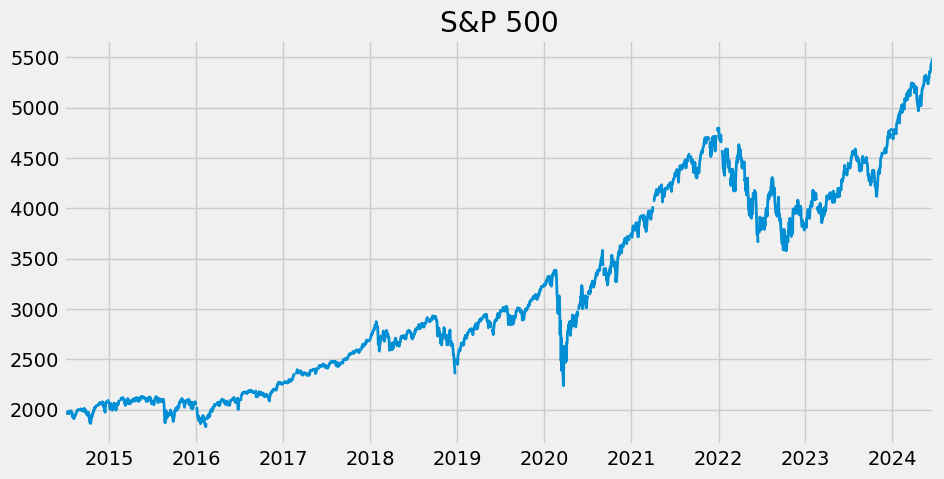

In [19]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [31]:
unemp_results = fred.search('unemployment')

In [28]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-27,2024-06-27,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-27,2024-06-27,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:02-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-06-27,2024-06-27,Unemployment Level,1948-01-01,2024-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-06-07 07:51:06-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-06-27,2024-06-27,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-06-27,2024-06-27,Continued Claims (Insured Unemployment),1967-01-07,2024-06-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-06-20 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-06-27,2024-06-27,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-06-27,2024-06-27,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-06-27,2024-06-27,Unemployment Rate - Married Women,1955-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:42-05:00,9,To obtain estimates of women worker employment...


In [32]:
unrate = fred.get_series(series_id='UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
Length: 917, dtype: float64

<Axes: >

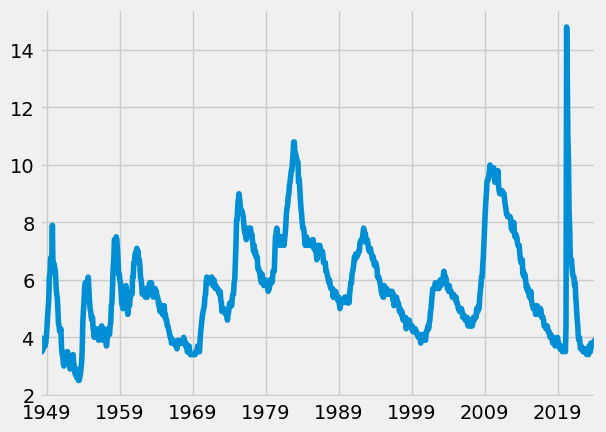

In [33]:
unrate.plot()

In [37]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-27,2024-06-27,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-27,2024-06-27,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:02-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-27,2024-06-27,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:04-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-06-27,2024-06-27,Unemployment Level,1948-01-01,2024-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-06-07 07:51:06-05:00,71,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-06-27,2024-06-27,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:07-05:00,23,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04032220,LNU04032220,2024-06-27,2024-06-27,Unemployment Rate - Sales and Related Occupations,2000-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:40-05:00,4,The series comes from the 'Current Population ...
SCMARI7URN,SCMARI7URN,2024-06-27,2024-06-27,"Unemployment Rate in Marion County, SC",1990-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-29 10:09:09-05:00,4,These data come from the Current Population Su...
VAALBE7URN,VAALBE7URN,2024-06-27,2024-06-27,"Unemployment Rate in Albemarle County, VA",1990-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-29 10:24:11-05:00,4,These data come from the Current Population Su...


In [36]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-27,2024-06-27,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-27,2024-06-27,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:04-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-06-27,2024-06-27,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-06-27,2024-06-27,Unemployment Rate in California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:02-05:00,64,None
TXUR,TXUR,2024-06-27,2024-06-27,Unemployment Rate in Texas,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000150,LNS14000150,2024-06-27,2024-06-27,Unemployment Rate - Married Men,1955-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:42-05:00,5,The series comes from the 'Current Population ...
NEIPTERM156SFRBRIC,NEIPTERM156SFRBRIC,2024-06-27,2024-06-27,Hornstein-Kudlyak-Lange Non-Employment Index i...,1994-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-14 14:48:03-05:00,5,The Hornstein-Kudlyak-Lange Non-Employment Ind...
LBSSA10,LBSSA10,2024-06-27,2024-06-27,Labor Force Participation Rate for Delaware,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:15-05:00,1,A state's labor-force participation rate is th...


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

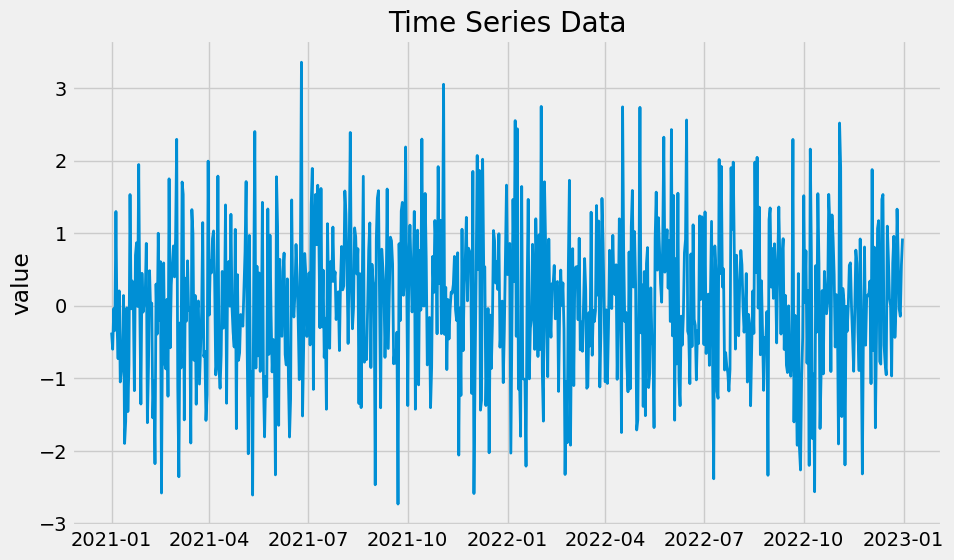

In [42]:
# Sample data
date_rng = pd.date_range(start='2021-01-01', end='2022-12-31', freq='D')
data = np.random.randn(len(date_rng))
df = pd.DataFrame(data, index=date_rng, columns=['value'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='value', data=df, lw=2)
plt.title("Time Series Data")
plt.show()

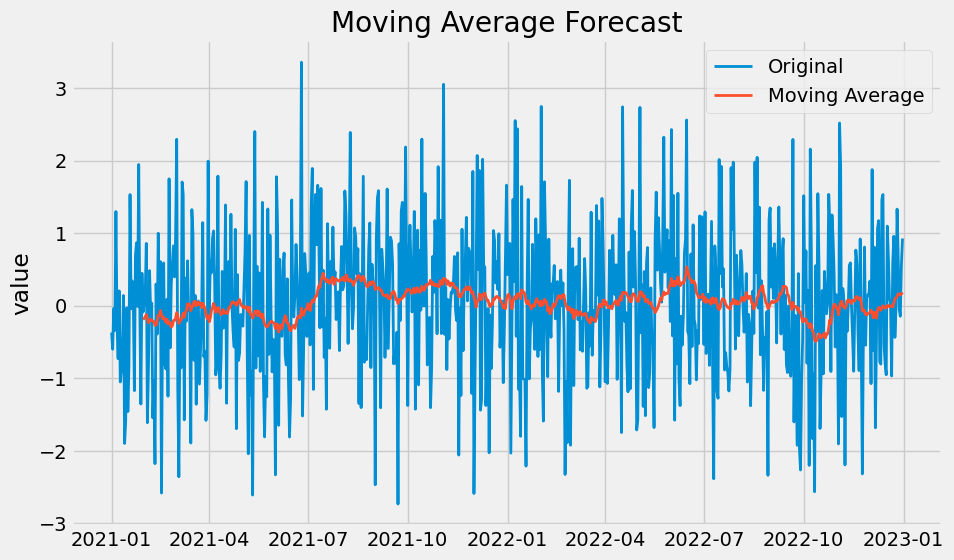

In [44]:
# Calculate the moving average
df['moving_average'] = df['value'].rolling(window=30).mean()

# Plot the moving average
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='value', data=df, label='Original', lw=2)
sns.lineplot(x=df.index, y='moving_average', data=df, label='Moving Average', lw=2)
plt.title("Moving Average Forecast")
plt.legend()
plt.show()

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

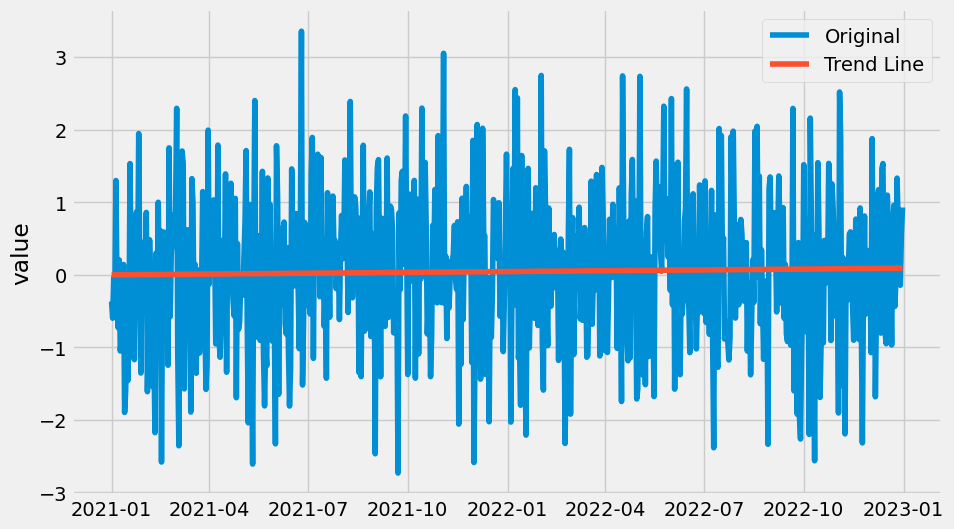

In [47]:
# Prepare the data for linear regression
df['time'] = np.arange(len(df.index))
X = df[['time']]
y = df['value']

# Fit a linear regression model
coef = np.polyfit(X['time'], y, 1)
trend = np.polyval(coef, X['time'])

# Create future time points
future_time = np.arange(len(df.index), len(df.index) + 30)
future_trend = np.polyval(coef, future_time)

# Plot the original data and the trend line
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='value', data=df, label='Original')
sns.lineplot(x=df.index, y=trend, label='Trend Line')

# Plot the forecasted trend line
future_dates = pd.date_range(start=df.index[-1], periods=31, closed='right')
sns.lineplot(x=future_dates, y=future_trend, label='Forecast', linestyle='--')
plt.title("Linear Regression Forecast")
plt.legend()
plt.show()


NameError: name 'future_dates' is not defined

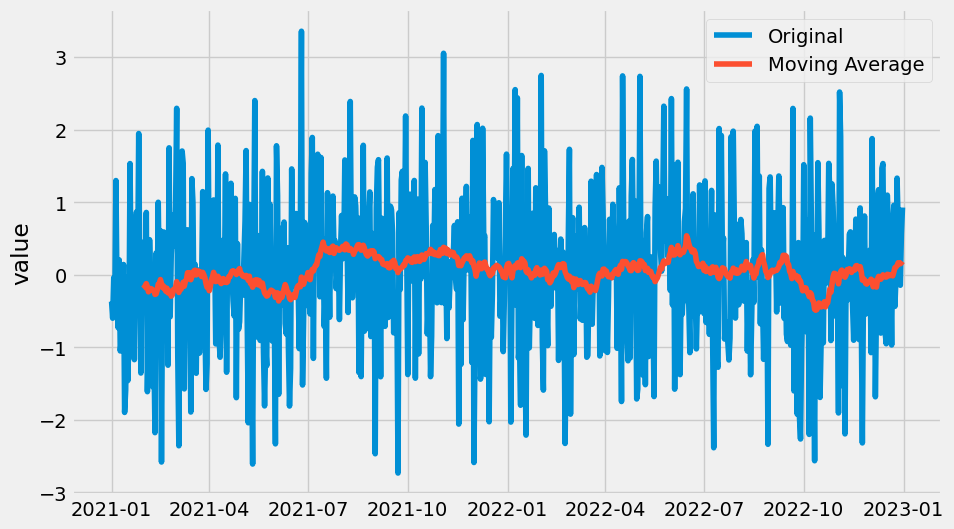

In [48]:
# Calculate combined forecast
combined_forecast = df['moving_average'].iloc[-1] + (future_trend - trend[-1])

# Plot the combined forecast
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='value', data=df, label='Original')
sns.lineplot(x=df.index, y='moving_average', data=df, label='Moving Average')
sns.lineplot(x=future_dates, y=combined_forecast, label='Combined Forecast', linestyle='--')
plt.title("Combined Moving Average and Linear Regression Forecast")
plt.legend()
plt.show()
